### Load MNIST dataset from PyTorch

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           download=True)

### Data type conversion

In [23]:
# Change data type : torch.Tensor -> numpy array
X = train_dataset.train_data.numpy()
y = train_dataset.train_labels.numpy()
print('Data size: ' + str(X.shape))
num_samples, height, width = X.shape 
dim = height * width

Data size: (60000, 28, 28)


### Data visualization

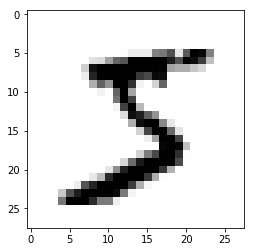

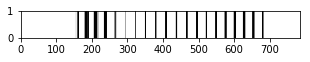

In [24]:
# Visualize MNIST data (1st digit)

image = np.reshape(X[0], [28, 28])

plt.imshow(image, cmap='gray_r')

plt.show()
# Visualize MNIST data in a vector form (1st digit)

plt.figure(figsize=(5, 0.5))

image2 = np.reshape(X[0], [1, 28*28])

plt.imshow(image2, cmap='gray_r', aspect='auto', extent=(0, 784, 0, 1))

### Principal Component Analysis (PCA)

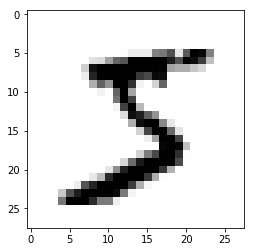

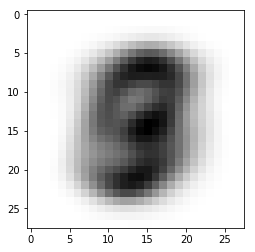

In [25]:
# Step 0: Vectorize all images
X_vec = np.zeros((num_samples, height * width))

for index in range(num_samples):
    X_vec[index,:] = np.reshape(X[index], [1, height * width])

X_mean = np.mean(X_vec, axis=0)

# Step 1: Subtract the mean
X_zero = np.zeros((num_samples, height * width))

for index1 in range(num_samples):
    X_zero[index1, :] = X_vec[index1] - X_mean


# Step 2: Compute Data Covariance by two equivalent ways
    
X_cov = np.zeros((num_samples, height * width))

X_cov = np.cov(X_zero.T)


# Step 3: Compute Eigenvalues & Eigenvectors of Covariance Matrix

U, s, V = np.linalg.svd(X_cov)

# U = eigenvector = V.T // s는 eigen value
# s는 linalg.svd 가 크기 순으로 soring해서 넘겨줌 // s[0]이 최댓값


########################################### 비교


plt.imshow(image, cmap='gray_r')

plt.show()

imageMEAN = np.reshape(X_mean, [28, 28])

plt.imshow(imageMEAN, cmap='gray_r')

plt.show()

### Fraction of variance
$FoV(k) = \frac{\sum_i^k s_i}{\sum_i^D s_i}$<br>

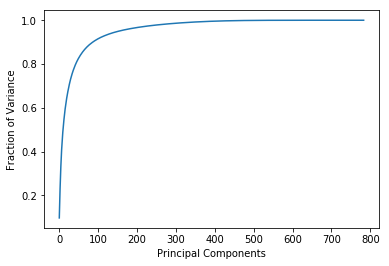

In [26]:
F_var = np.zeros((num_samples))
F_var = np.cumsum(s) # 분자 배열

total_s = np.sum(s) # 분모

F_var /= total_s

x = np.arange(width * height) # x축 설정
plt.plot(x, F_var)
plt.xlabel('Principal Components')
plt.ylabel('Fraction of Variance')
plt.show()

In [27]:
over_80 = np.where(F_var > 0.8)
print('80%이상 분산을 잡을려면',over_80[0][0],'개 이상 principal이 필요합니다')

80%이상 분산을 잡을려면 43 개 이상 principal이 필요합니다


### Low-dimensional reconstruction

$\hat{x}_i = \overline{x} + \sum_{k=1}^K (x_i\cdot e_k) e_k$<br>
where<br>
$x_i$ is the i-th image sample,<br>
$e_k$ is the eigenvector of k-th largest eigenvalue,<br>
$\overline{x}$ is the mean of entire images,<br>
$\hat{x}_i$ is the reconstructed image from $K$ eigenvectors.

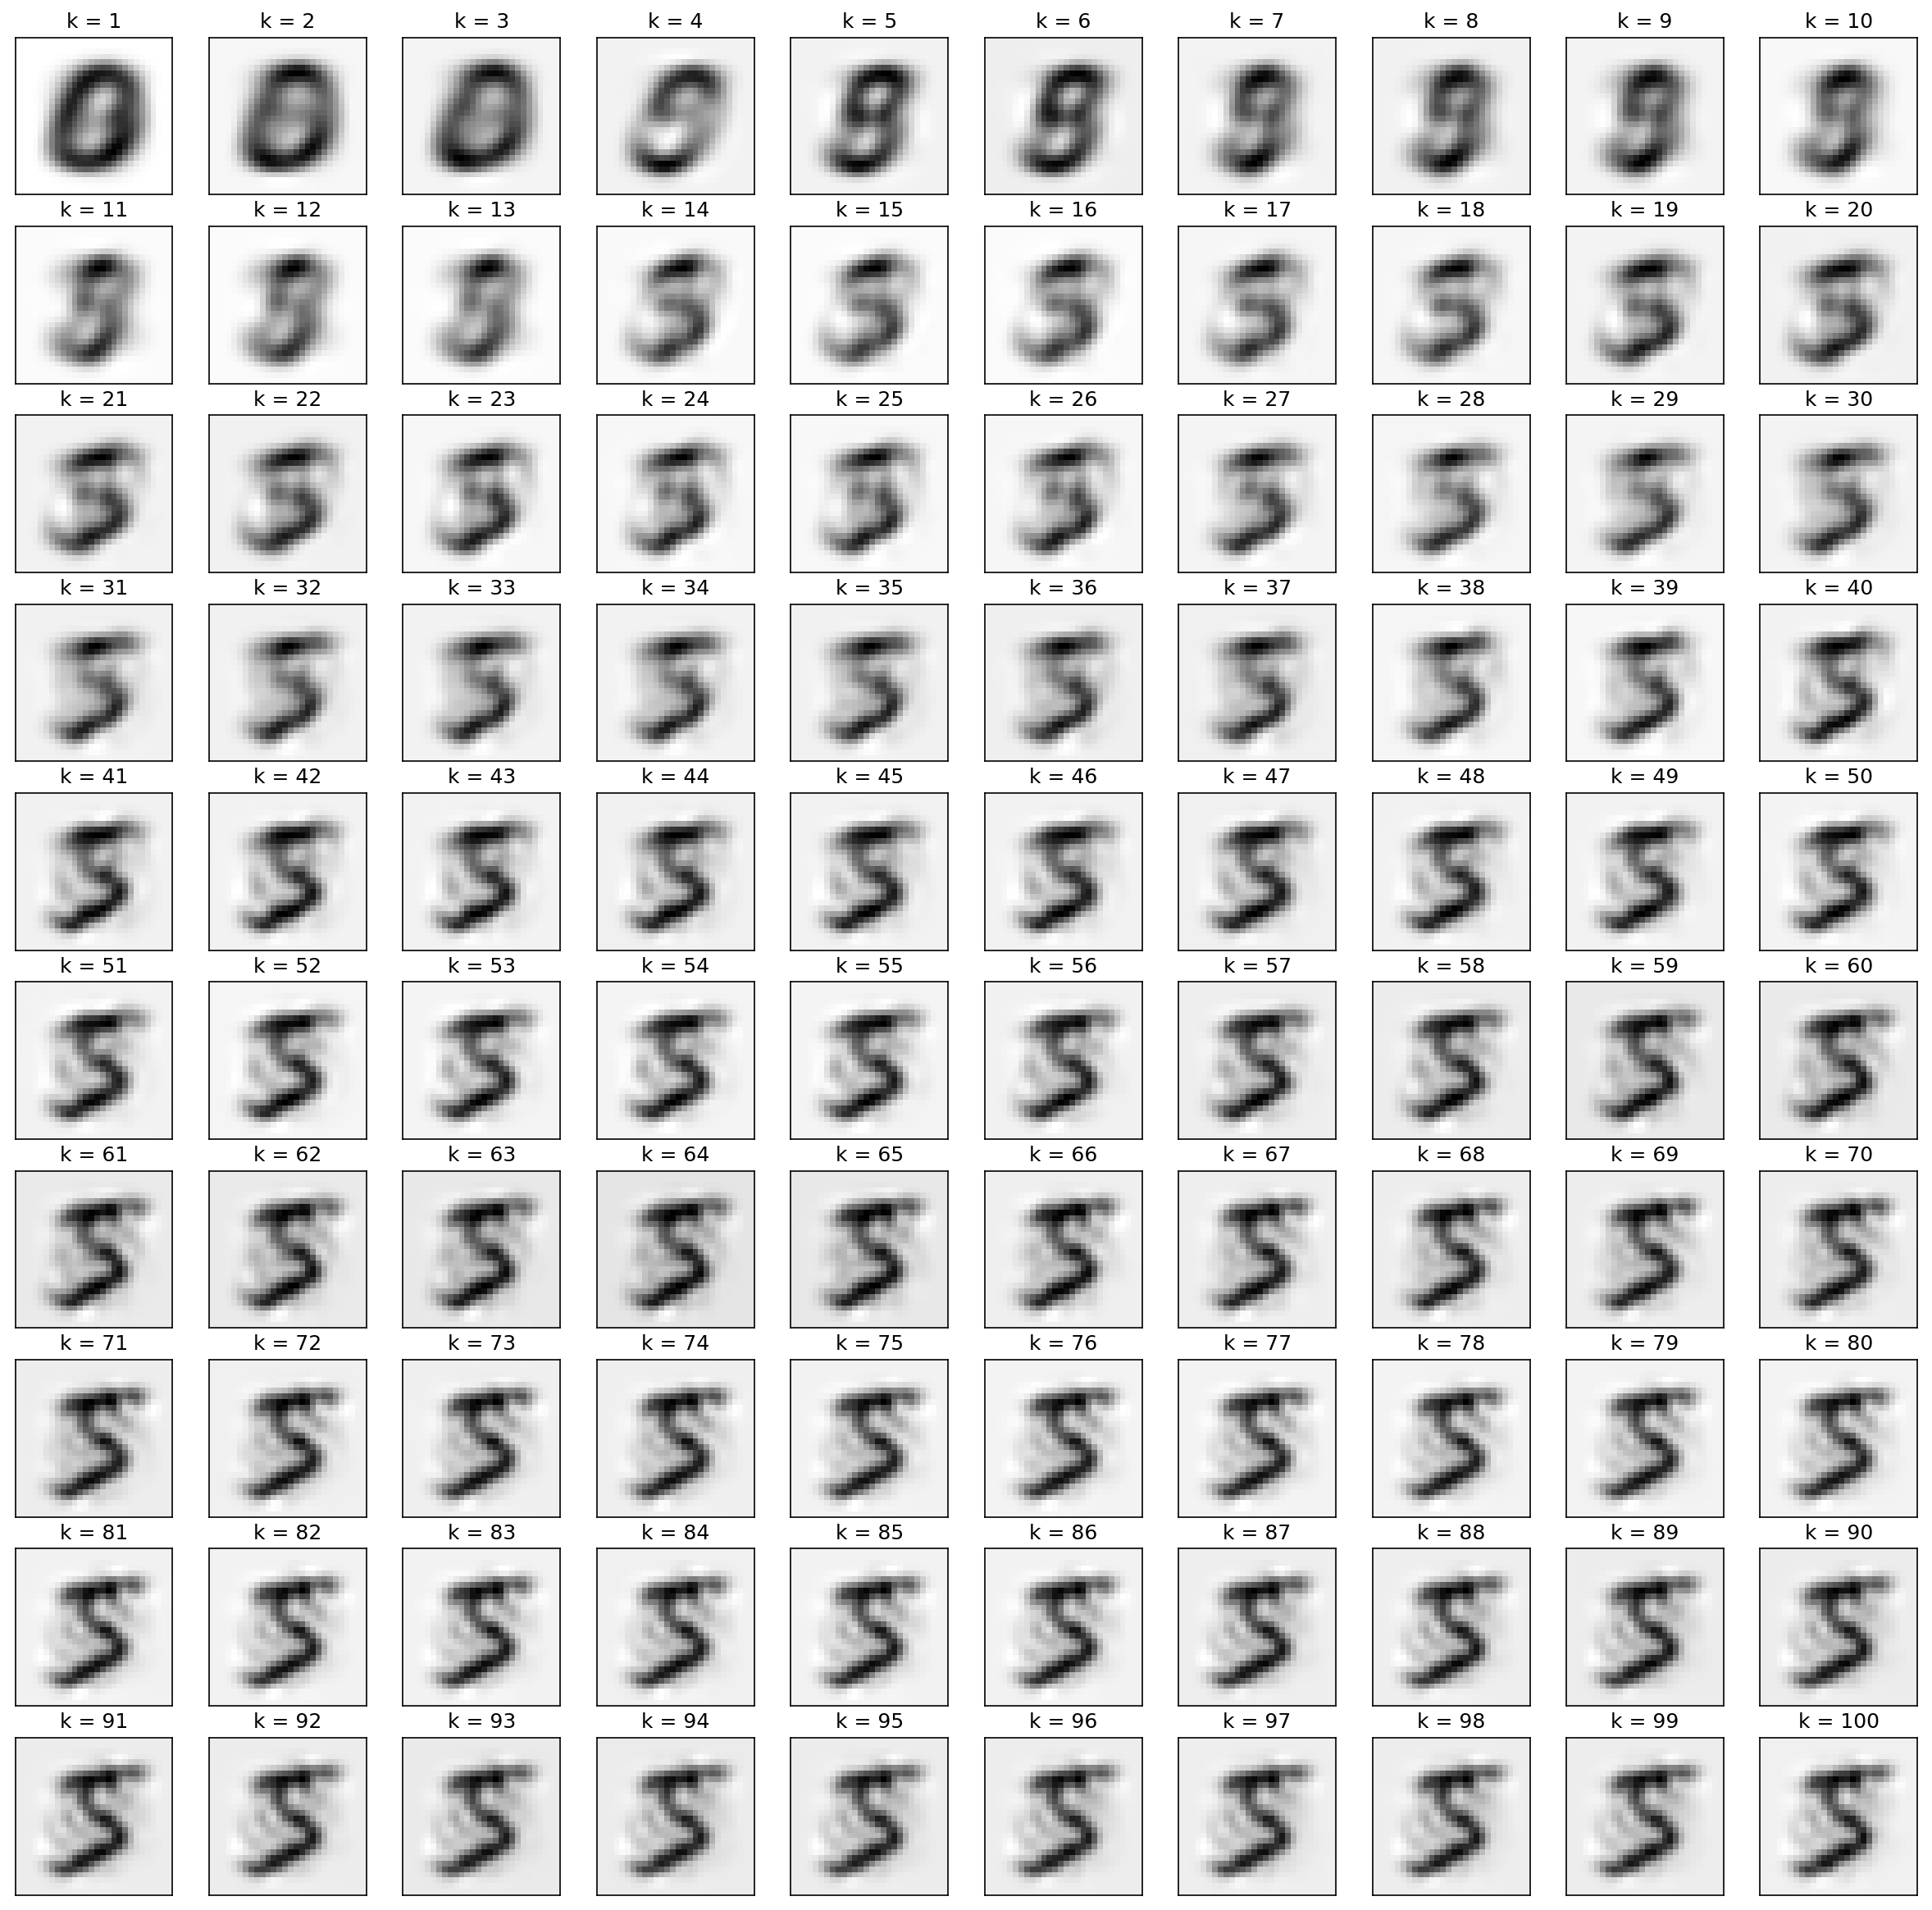

In [28]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20), dpi=150)
X_re = X_mean
for k in range(100):
    X_re += np.dot(X_vec[0],V[k].T) * V[k] 
    image_temp = np.reshape(X_re, [28, 28])
    axes[k//10, k%10].imshow(image_temp, cmap='gray_r')
    axes[k//10, k%10].set_title('k = ' + str(k+1))
    axes[k//10, k%10].set_xticks([])
    axes[k//10, k%10].set_yticks([])
plt.show()
